In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
import requests
import time
from ta import macd
import numpy as np
from datetime import datetime, timedelta
from pytz import timezone
import pandas as pd
import yfinance as yf
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
print('Getting current ticker data...')
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
#df.to_csv('S&P500-Info.csv')
#df.to_csv("S&P500-Symbols.csv", columns=['Symbol'])

Getting current ticker data...


In [3]:
df.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [4]:
#df.stack().str.replace('.','-').unstack()
df = df.replace({'BRK.B':'BRK-B'})
df = df.replace({'BF.B':'BF-B'})
df = df.replace({'CARR':'','OTIS':'','VNT':''})

In [5]:
tickerlist = []
count = 0
tickers = ""
for ticker in df['Symbol']:
    count +=1
    tickers = tickers+ " " + ticker
    if ticker != '':
        tickerlist.append(ticker)
    if count > 500:
        break
tickers = tickers[1:]
print(tickers)

MMM ABT ABBV ABMD ACN ATVI ADBE AMD AAP AES AFL A APD AKAM ALK ALB ARE ALXN ALGN ALLE LNT ALL GOOGL GOOG MO AMZN AMCR AEE AAL AEP AXP AIG AMT AWK AMP ABC AME AMGN APH ADI ANSS ANTM AON AOS APA AAPL AMAT APTV ADM ANET AJG AIZ T ATO ADSK ADP AZO AVB AVY BKR BLL BAC BK BAX BDX BRK-B BBY BIO BIIB BLK BA BKNG BWA BXP BSX BMY AVGO BR BF-B CHRW COG CDNS CPB COF CAH KMX CCL  CTLT CAT CBOE CBRE CDW CE CNC CNP CERN CF SCHW CHTR CVX CMG CB CHD CI CINF CTAS CSCO C CFG CTXS CLX CME CMS KO CTSH CL CMCSA CMA CAG COP ED STZ COO CPRT GLW CTVA COST CCI CSX CMI CVS DHI DHR DRI DVA DE DAL XRAY DVN DXCM FANG DLR DFS DISCA DISCK DISH DG DLTR D DPZ DOV DOW DTE DUK DRE DD DXC EMN ETN EBAY ECL EIX EW EA EMR ENPH ETR EOG EFX EQIX EQR ESS EL ETSY EVRG ES RE EXC EXPE EXPD EXR XOM FFIV FB FAST FRT FDX FIS FITB FE FRC FISV FLT FLIR FLS FMC F FTNT FTV FBHS FOXA FOX BEN FCX GPS GRMN IT GD GE GIS GM GPC GILD GL GPN GS GWW HAL HBI HIG HAS HCA PEAK HSIC HSY HES HPE HLT HFC HOLX HD HON HRL HST HWM HPQ HUM HBAN HII IEX ID

In [26]:
# year, month, day
data = yf.download(tickers, start="2019-01-01", end="2021-03-12")
print('Congrats, it worked!')

[*********************100%***********************]  498 of 498 completed
Congrats, it worked!


In [27]:
data['Volume']

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2113300.0,5229500.0,1291000.0,148158800.0,6908400.0,1149700.0,590000.0,8737200.0,2059300.0,2784100.0,...,4950000.0,7442000.0,4174400.0,4476100.0,2478400.0,16727200.0,2899400.0,3726900.0,990900.0,1743400.0
2019-01-03,5383900.0,16822000.0,1514700.0,365248800.0,7653200.0,1499400.0,665300.0,10570700.0,2801300.0,3663500.0,...,4295200.0,9788300.0,2885100.0,5287600.0,2666200.0,13866100.0,2382100.0,3390100.0,1243100.0,2680300.0
2019-01-04,3123700.0,9369600.0,1423000.0,234428400.0,8910600.0,2417700.0,624300.0,8299100.0,2296400.0,4043400.0,...,4908500.0,5843900.0,3007200.0,5535600.0,3011700.0,16043600.0,2787800.0,4557100.0,970900.0,2142700.0
2019-01-07,3235100.0,8010700.0,2088300.0,219111200.0,7281500.0,1608300.0,710600.0,9503000.0,2315600.0,3638500.0,...,6236200.0,6562200.0,3143800.0,4208100.0,2826100.0,10844200.0,2362800.0,3293100.0,1341600.0,2561100.0
2019-01-08,1578100.0,7107700.0,1604700.0,164101200.0,7478300.0,1689500.0,570700.0,8905100.0,2647800.0,3685900.0,...,6332800.0,6232800.0,2255700.0,3128300.0,3172500.0,11439000.0,2277600.0,3552600.0,912800.0,2604700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-08,2766600.0,39776900.0,1330700.0,153918600.0,6048200.0,1149900.0,320300.0,3931600.0,2856100.0,3883500.0,...,7091800.0,3715200.0,1987000.0,5020900.0,2506400.0,38142300.0,2664300.0,1891300.0,689800.0,2036900.0
2021-03-09,2291100.0,39820400.0,1141600.0,129159600.0,6856700.0,1599100.0,326000.0,5176100.0,2729200.0,3924200.0,...,7100200.0,4031200.0,1438200.0,4960400.0,3035600.0,35605200.0,2716900.0,2113200.0,906700.0,2502600.0
2021-03-10,1934600.0,44224900.0,1014600.0,111760400.0,5761400.0,1880200.0,256400.0,7640200.0,2046000.0,2746300.0,...,6846000.0,3654700.0,1554900.0,3530800.0,1755600.0,31551900.0,1670000.0,1447900.0,1011800.0,1995500.0


In [28]:
buy = []
sell = []
hold = []

for ticker in tickerlist:
    pct_change = ((data['Adj Close'][ticker][-1]-data['Adj Close'][ticker][-2])/data['Adj Close'][ticker][-2])*100
    if pct_change > 1.00:
        buy.append(ticker)
    elif pct_change <= -1.00:
        sell.append(ticker)
    else:
        hold.append(ticker)
print('Buy:')
print(len(buy)) 
print('Sell:')
print(len(sell))
print('Hold:')
print(len(hold))
print('Ticker List:')
print(len(tickerlist))
print('Double Check:')
print(len(buy) + len(sell) + len(hold))

Buy:
0
Sell:
0
Hold:
498
Ticker List:
498
Double Check:
498


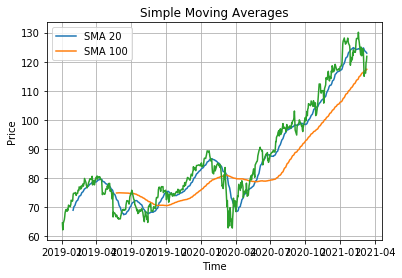

In [29]:
data['SMA_20'] = data['Adj Close']['A'].rolling(window=20).mean()
data['SMA_100'] = data['Adj Close']['A'].rolling(window=100).mean()
plt.grid(True)

plt.plot(data['SMA_20'],label= 'SMA 20')
plt.plot(data['SMA_100'],label= 'SMA 100')
plt.plot(data['Adj Close']['A'])

plt.title('Simple Moving Averages')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=2)
plt.show()



In [32]:
buy1 = []
sell1 = []
hold1 = []
for ticker in tickerlist:
    data['SMA_20'] = data['Adj Close'][ticker].rolling(window=20).mean()
    data['SMA_100'] = data['Adj Close'][ticker].rolling(window=100).mean()
    #plt.grid(True)

    #plt.plot(data['SMA_20'],label= 'SMA 20')
    #plt.plot(data['SMA_100'],label= 'SMA 100')
    #plt.plot(data['Adj Close'][ticker])

    #plt.title('Simple Moving Averages')
    #plt.xlabel('Time')
    #plt.ylabel('Price')
    #plt.legend(loc=2)
    #plt.show()


    if data['SMA_20'][-1] > data['SMA_100'][-1]:
        buy1.append(ticker)
    elif data['SMA_20'][-1] < data['SMA_100'][-1]:
        sell1.append(ticker)
    else:
        hold1.append(ticker)

        
print('---------Buy--------------')
print(buy1)
print(len(buy1))
print('--------------------------')
print('---------Sell-------------')
print(sell1)
print(len(sell1))
print('--------------------------')
print('---------Hold--------------')
print(hold1)
print(len(hold1))
print('--------------------------')

---------Buy--------------
[]
0
--------------------------
---------Sell-------------
[]
0
--------------------------
---------Hold--------------
['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK-B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF-B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', '

In [11]:
buyboi = (len(buy1))
tots = len(tickerlist)
maf = ((buyboi)/(tots))*100
print(maf)

76.50602409638554


In [12]:
api_key = 'PK170GRGD0QNMHX3T5RR'
api_secret_key = 'cczCEKo6n9tDKuc2hE2rEcIXiHmQ4TmDKsfUg0a8'